(NIConfigExample)=
# Example: NI Config File

An example NI configuration file lives at `tests/Example_Config_Formulae/20240329_1354_CalorimetryWLaser_Dushyant.csv`.

Here, this file will be read and the columns their expected values and use will be discussed.

In [1]:
# First, the config file will be imported here and discussed.
# Columns necessary for running the NI acquisition will be discussed first.
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

config_file_path = "../tests/Example_Config_Formulae/20240329_1354_CalorimetryWLaser_Dushyant.csv"
config_df = pl.read_csv(config_file_path)
config_df.columns = [i.strip() for i in config_df.columns]

with pl.Config() as cfg:
    cfg.set_tbl_cols(config_df.shape[1])
    cfg.set_tbl_rows(config_df.shape[0])
    cfg.set_fmt_str_lengths(100)
    cfg.set_float_precision(3)
    cfg.set_tbl_formatting("UTF8_FULL")
    # cfg.set_tbl_hide_column_data_types(True)
    cfg.set_tbl_hide_dataframe_shape(True)
    pl_cfg_json = cfg.save()
    print("Total number of columns in config file: " + str(config_df.shape[1]) + "\nTotal rows in this config file: " + str(config_df.shape[0]))

    print("\nMinumum required columns for creating an NI task is shown below for the example config file\n")
    print(config_df[["Device","Channel","TCType","Type","Label"]],"\n")

Total number of columns in config file: 16
Total rows in this config file: 15

Minumum required columns for creating an NI task is shown below for the example config file

┌──────────────────────┬─────────┬────────┬──────────────┬─────────────┐
│ Device               ┆ Channel ┆ TCType ┆ Type         ┆ Label       │
│ ---                  ┆ ---     ┆ ---    ┆ ---          ┆ ---         │
│ str                  ┆ str     ┆ str    ┆ str          ┆ str         │
╞══════════════════════╪═════════╪════════╪══════════════╪═════════════╡
│ cDAQ9185-21CD48CMod2 ┆ ai0     ┆  NA    ┆ Voltage      ┆ AmbHum      │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ cDAQ9185-21CD48CMod2 ┆ ai1     ┆  NA    ┆ Voltage      ┆ AmbTemp     │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ cDAQ9185-21CD48CMod2 ┆ ai2     ┆  NA    ┆ Voltage      ┆ AmbPress    │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ cDAQ9185-21CD48CMod3 ┆ 

(MinConfigcols)=
### Minimum required NI config file

In the table shown above, there are 4 columns, and 15 rows. The rows indicate unique set of NI channels that were used in this configuration file. The columns are the minimum columns required to run the NI acquisition.

- `Device`: type - str.
    - Indicates the NI Device to be connected
- `Channel`: type - str.
    - Indicates the channel for the corresponding device in the row.
- `TCType`: type - str.
    - Indicates the Thermocouple types that can be used.
    - Currently, nidaqmx driver and python API supports the use of `B`,`E`,`J`,`K`,`N`,`R`,`S`, or `T` thermocouple type.
    - You can write anything in the `TCType` corresponding to the Voltage channel `Type`. This column will not be used to configure the NI Task.

- `Type`: type - str.
    - Indicates the type of channel from which the data needs to be acquired or data needs to be sent.
    - For AI, these values must be `Voltage`, `Thermocouple`, or `Current`. Out of these, only `Voltage` and `Thermocouple` are tested and if you want face issues with using the `Current` type, please raise and issue on [GitHub](https://github.com/ulfsri/firepydaq/issues).

- `Label`: type - str.
    - A unique identifier for the `Device/Channel`.
    - This unique label serves as the column header for the corresponding collected NI data.
    - This label is also used during post-processing, which can be as minimal as scaling the raw-data.(See [Additional columns](PPcols) and [FormulaeExample](FormulaeExample) for more info)

### Overview of creation of NI tasks
1. First, the config file is read to separate and identify AI and AO tasks. A dictionary mapping AI and AO tasks to the row index is created.

2. Then, a single AI task are created to add all available AI labels. Same is done for AO task.

3. For each AI row, the device is added by appending the `Device` and the `Channel` column, separated by `/`.

   - For example, the device name for adding a virtual chennle to the AI task for the first row is `cDAQ9185-21CD48CMod2/ai0`

5. The relevant channel is added to the AI task as follows,
    1. For `Thermocouple` type, the `TCType` is used to add a thermocouple channel to the AI task.
    
    2. For `Voltage` type, the default unit of `Volts` is used for adding the channel to the AI task.
    
    3. For `Current` type, the default unit of `Amps` is used for adding the channel to the AI task.
  
5. AO task channels are added in a similar way as AI tasks. Currently, only Voltage AO channels are accepted.

    **`Note: AO task is still under development. Please raise an issue if you face problems.`**

(PPcols)=
### Additional columns
*The additional columns that will be listed below can be used for adding custom scaling and post processing only if dashboard is selected as a display option*

**NOTE: These columns from the config file will be used only to scale the raw data for each channel give in the row and plot it in the dashboard (with time as x-axis) if the `Chart` column value is not `None` for that channel.**

In [2]:
with pl.Config() as cfg:
    cfg.load(pl_cfg_json)

    print("\nAdditional columns (required for succesfull dashboard generation)\nare shown below for the example config file\n")
    dashboard_df = config_df.select(pl.exclude("Device","Channel","TCType","Type"))
    print(dashboard_df)
    


Additional columns (required for succesfull dashboard generation)
are shown below for the example config file

┌─────┬───────┬────────┬────────┬────────┬────────┬────────┬───────┬───────┬───────┬───────┬───────┐
│ #   ┆ Panel ┆ ScaleM ┆ ScaleM ┆ Label  ┆ Chart  ┆ AIRang ┆ AIRan ┆ Layou ┆ Posit ┆ Proce ┆ Legen │
│ --- ┆ ---   ┆ ax     ┆ in     ┆ ---    ┆ ---    ┆ eMin   ┆ geMax ┆ t     ┆ ion   ┆ ssed_ ┆ d     │
│ i64 ┆ i64   ┆ ---    ┆ ---    ┆ str    ┆ str    ┆ ---    ┆ ---   ┆ ---   ┆ ---   ┆ Unit  ┆ ---   │
│     ┆       ┆ f64    ┆ i64    ┆        ┆        ┆ f64    ┆ f64   ┆ i64   ┆ i64   ┆ ---   ┆ str   │
│     ┆       ┆        ┆        ┆        ┆        ┆        ┆       ┆       ┆       ┆ str   ┆       │
╞═════╪═══════╪════════╪════════╪════════╪════════╪════════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ 0   ┆ 1     ┆ 100.00 ┆ 0      ┆ AmbHum ┆ PTH    ┆ 1.000  ┆ 5.000 ┆ 3     ┆ 1     ┆ %     ┆ Amb.  │
│     ┆       ┆ 0      ┆        ┆        ┆        ┆        ┆       ┆       ┆    

The importance of each column in the above table is explained with the example of the first row. 

1. ` ` : str/num
   - Only a reference for the user. Is not used at all.
2. `Panel`: str/num
   - Only a reference for the user. Not used at all.
3. `ScaleMax`: str/num
   - Must be in the form that can be converted to a float value.
   - Refers to the *maximum value in scaled data unit* corresponding to `AIRangeMax`.
3. `ScaleMin`: str/num
   - Must be in the form that can be converted to a float value.
   - Refers to the *minimum value in scaled data* unit corresponding to `AIRangeMin`.
4. `Label`: str
   - Unique identifier as explained in {ref}`MinConfigcols`.
5. `Chart`: str
   - String indicating the chart where this channel's post processed data will be displayed.
   - This can be `None` is you do not want to see this channel in the dashboard plots.
6. `AIRangeMax`: str/num
    - *Maximum* value for the raw data for the *analog input channel*.
    - Must be in the form that can be converted to a float value.
7. `AIRangeMin`: str/num
    - *Minimum* value for the raw data for the *analog input channel*.
    - Must be in the form that can be converted to a float value.
8. `Layout`: str/num
    - Must be in the form that can be converted into a natural number (1, 2, 3)
    - The type of layout corresponding to the `Chart` parameter.
    - All channels which are have the same `Chart` parameter must have the same `Layout` value.
    - This will generate a figure in the dashboard that will have \#`Layout` rows in vertical direction.
    - It is recommended to keep this value to a maximum of 3 for better visualization in the dashboard.
9. `Position`: str/num
    - Must be in the form that can be converted into a natural number (1, 2, 3)
    - Indicates the position in the `Chart` where this channel data will be displayed.
    - This value **must** be less than or equal to the `Layout` number.
10. `Processed_Unit`: str
    - The unit of the channel data once it is scaled according to AI and Scale minimum and maximum values.
    - This will be the y-axis label for the row.
11. `Legend`: str
    - Legend for the channel.
    - This will be displayed on the outside right of the plot in the dashboard.

(Scaling)=
### Scaling of raw-data

An example is shown below regarding how the channels corresponding to PTH Charts are scaled. These channels are ambient humidity, temperature and pressure and the raw data for these are in volts. To do this, the example experiment data that is in `../tests/Example_ExpData/20240612_1717_ExampleFireData_Testing_Dushyant.parquet` is read and processed for these channels.

The scaling is done using a function `ScaleData` that is borrowed from the `ScaleData` function in `utilities`. Additional details can be found in {doc}`Utilities documentation<autoapi/firepydaq/utilities/index>`.

In [3]:
Exp_path = '../tests/Example_ExpData/20240612_1717_ExampleFireData_Testing_Dushyant.parquet'
Exp_data = pl.read_parquet(Exp_path)
Exp_data = Exp_data[["Absolute_Time", "Time", "AmbHum", "AmbTemp", "AmbPress"]]
Exp_data = Exp_data.select(pl.col("Absolute_Time").cast(pl.String),
                           pl.col("Time").cast(pl.Float32),
                           pl.col("AmbHum").cast(pl.Float32),
                           pl.col("AmbTemp").cast(pl.Float32),
                           pl.col("AmbPress").cast(pl.Float32)
                          )
with pl.Config() as cfg:
    cfg.load(pl_cfg_json)
    print("These three columns, in addition to Time and Absolute_Time are shown below.\nThe data for the three PTH columns of interest here are in Volts.")
    print(Exp_data.head(6))


These three columns, in addition to Time and Absolute_Time are shown below.
The data for the three PTH columns of interest here are in Volts.
┌───────────────────────────┬───────┬────────┬─────────┬──────────┐
│ Absolute_Time             ┆ Time  ┆ AmbHum ┆ AmbTemp ┆ AmbPress │
│ ---                       ┆ ---   ┆ ---    ┆ ---     ┆ ---      │
│ str                       ┆ f32   ┆ f32    ┆ f32     ┆ f32      │
╞═══════════════════════════╪═══════╪════════╪═════════╪══════════╡
│ 12/06/2024, 17:17:33:5716 ┆ 0.000 ┆ 2.217  ┆ 2.420   ┆ 4.022    │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┤
│ 12/06/2024, 17:17:33:6716 ┆ 0.100 ┆ 2.217  ┆ 2.420   ┆ 4.022    │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┤
│ 12/06/2024, 17:17:33:7716 ┆ 0.200 ┆ 2.217  ┆ 2.420   ┆ 4.022    │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┤
│ 12/06/2024, 17:17:33:8716 ┆ 0.300 ┆ 2.217  ┆ 2.420   ┆ 4.022    │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌

In [5]:
def ScaleData(Exp_data, config_df):
    """ This function is borrowed from the ScaleData
    function in `PostProcessing.py` in `utilities`.
    Check documentation in FIREpyDAQ modules for more information.
    """
    df_processed = pl.DataFrame()
    for col in Exp_data.columns:
        crow_df = config_df.filter(pl.col("Label") == col)
        if ("AbsoluteTime" not in col) and ("Absolute_Time" not in col):  
            # Checking for either these two strings in the data df.
            # Cast all other data except for absolute time stamp as floats
            Exp_data = Exp_data.cast({col: pl.Float32})
        if "Time" in col:
            # Make not scaling for Time column
            df_processed = df_processed.with_columns(pl.Series(Exp_data.select(col)).alias(col))
        elif "None" in crow_df.select("Chart").item().strip() == "None":
            # Skip columns without chart values
            continue
        elif not config_df.filter(pl.col("Type") == "Thermocouple").filter(pl.col("Label") == col).is_empty():
            df_processed = df_processed.with_columns(pl.Series(Exp_data.select(col)).alias(col))
        else:
            try:
                min_AI = np.float32(crow_df.select("AIRangeMin").item())
                max_AI = np.float32(crow_df.select("AIRangeMax").item())
                min_Scale = np.float32(crow_df.select("ScaleMin").item())
                max_Scale = np.float32(crow_df.select("ScaleMax").item())
                unit_per_V = (max_Scale - min_Scale)/(max_AI - min_AI)
                df_processed = df_processed.with_columns((pl.Series((Exp_data.select(pl.col(col))-min_AI)*unit_per_V+min_Scale)).alias(col))
            except ValueError:
                # Is there is any ValueError, no scaling will be done to the data
                df_processed = df_processed.with_columns(pl.Series(Exp_data.select(col)).alias(col))
    return df_processed

df_processed = ScaleData(Exp_data, config_df)

with pl.Config() as cfg:
    cfg.load(pl_cfg_json)
    print("These three columns, in addition to Time and Absolute_Time are shown below\nas processed based on the above function.\n")
    print(df_processed.head(6))

These three columns, in addition to Time and Absolute_Time are shown below
as processed based on the above function.

┌───────────────────────────┬───────┬────────┬─────────┬──────────┐
│ Absolute_Time             ┆ Time  ┆ AmbHum ┆ AmbTemp ┆ AmbPress │
│ ---                       ┆ ---   ┆ ---    ┆ ---     ┆ ---      │
│ str                       ┆ f32   ┆ f32    ┆ f32     ┆ f32      │
╞═══════════════════════════╪═══════╪════════╪═════════╪══════════╡
│ 12/06/2024, 17:17:33:5716 ┆ 0.000 ┆ 30.422 ┆ 29.706  ┆ 1014.410 │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┤
│ 12/06/2024, 17:17:33:6716 ┆ 0.100 ┆ 30.422 ┆ 29.705  ┆ 1014.407 │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┤
│ 12/06/2024, 17:17:33:7716 ┆ 0.200 ┆ 30.421 ┆ 29.705  ┆ 1014.405 │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┤
│ 12/06/2024, 17:17:33:8716 ┆ 0.300 ┆ 30.422 ┆ 29.706  ┆ 1014.407 │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌

As seen in the table above, the scaled data has units given in the `Processed_Unit` columns for these channels, as opposed to voltage raw data shown earlier. Going a little further, these post-processed data are plotted in dashboard in the following way.

**Note: Dashboard currently uses plotly to plot the graphs and the graphs are update live as the data is collected. Below is only an example figure drawn using matplotlib to show how it might look.**

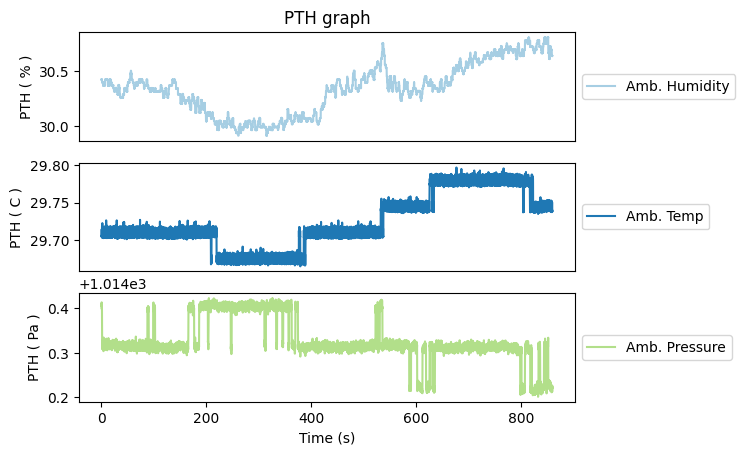

In [6]:
def PlotProcessed(df_processed, config_df):
    for _,chart_df in config_df.group_by(["Chart"]):
        if not chart_df.select("Label")[0].item() in df_processed.columns:
            continue
        _,axes = plt.subplots(chart_df.select("Layout")[0].item())
        if not isinstance(axes,np.ndarray): # If it is only a single axis
            axes = [axes]
        colors = plt.get_cmap("Paired",10)
        colors = [i for i in colors.colors]
        colors = iter(colors)
        chart_nos = int(chart_df["Layout"][0]) - 1
        for row in chart_df.iter_rows(named=True):
            plot_pos = int(row["Position"])-1
            axes[plot_pos].plot(df_processed.select("Time"),df_processed.select(row["Label"]),label=row["Legend"], c = next(colors))
            axes[plot_pos].set_xlabel("Time (s)")
            axes[plot_pos].set_ylabel(row["Chart"]+" ( "+row["Processed_Unit"]+" )")
            axes[plot_pos].legend(loc='center left', bbox_to_anchor=(1, 0.5))
            if not plot_pos == chart_nos:
                axes[plot_pos].get_xaxis().set_visible(False)
            if plot_pos == 0:
                axes[plot_pos].set_title(chart_df["Chart"][0] + " graph")
    plt.show()
    return

PlotProcessed(df_processed, config_df)